# Homework 2

**Inhalt:** Datensets explorieren, filtern, Daten kombinieren

**Nötige Skills:** Erste Schritte mit Pandas, Daten explorieren und kombinieren

**Lernziele:**
- Review und Übung

# Das Beispiel

Einwohner der Stadt Zürich und ihre Herkunft. Wir sind interessiert an einer Auswertung, wo die Leute geboren sind, die in Zürich wohnen. Wie viele Menschen kommen aus welchen Gemeinden, Regionen, Ländern? Was sind das für Orte? Wie verändert sich die Population?

Open Data Set der Stadt Zürich.

Quelle: https://data.stadt-zuerich.ch/dataset/bev-bestand-jahr-gemeinde-land-geburtsort/resource/403b39e8-ecdc-410e-b0b3-7b689e17e046

Alle nötigen Files befinden sich im Unterordner `dataprojects/wherezurichborn`

## Vorbereitung

Importieren Sie die benötigten Libraries: pandas. Stellen Sie matplotlib so ein, dass die Charts irekt angezeigt werden.

In [2]:
import pandas as pd
%matplotlib inline 

## Daten laden

Öffnen Sie das Datenfile fürs Jahr 2017: "2017_bev338od3380.csv"

In [5]:
path = "dataprojects/wherezurichborn/2017_bev338od3380.csv"

In [6]:
df = pd.read_csv(path)

Zeigen Sie die obersten fünf Zeilen an

In [8]:
df.head(5)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171
2,2017,677800.0,241000.0,3,Bonstetten,8100,Schweiz,5
3,2017,682900.0,233100.0,4,Hausen am Albis,8100,Schweiz,16
4,2017,676400.0,239000.0,5,Hedingen,8100,Schweiz,6


Zeigen Sie die untersten fünf Zeilen an

In [9]:
df.tail(5)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
1760,2017,NaN,NaN,8995,Unbekannt,8615,Tuvalu,1
1761,2017,NaN,NaN,8995,Unbekannt,8621,Amerikanisch-Samoa,1
1762,2017,NaN,NaN,8995,Unbekannt,8654,Norfolkinsel,1
1763,2017,NaN,NaN,8995,Unbekannt,8671,Französisch-Polynesien,1
1764,2017,NaN,NaN,8995,Unbekannt,8995,Unbekannt,1011


Überlegen Sie sich: Was bedeuten die einzelnen Spalten? Welche Spalte enthält die wichtigen Infos?

In [ ]:
# Anwort in Worten

#GebOrtLang undGegLandLang für Herkunft, dazu die ensprechenden -Sort für die IDs
#AnzBestWir: wieviele Menschen kommen von dort

Checken Sie die Datentypen der Spalten.

In [10]:
df.dtypes

StichtagDatJahr      int64
xkoord             float64
ykoord             float64
GebOrtSort           int64
GebOrtLang          object
GebLandSort          int64
GebLandLang         object
AnzBestWir           int64
dtype: object

In [16]:
df.columns

Index(['StichtagDatJahr', 'xkoord', 'ykoord', 'GebOrtSort', 'GebOrtLang',
       'GebLandSort', 'GebLandLang', 'AnzBestWir'],
      dtype='object')

Sind die Daten sauber?

In [11]:
# Ja, scheint so. Nur Geburtsort und - Land sind objects.

Wie viele Einträge hat es insgesamt im Datensatz?

In [12]:
df.shape

(1765, 8)

In [13]:
len (df)

1765

## Einfache Auswertungen

Wie viele Einwohner sind im Total in der Statistik enthalten?

In [15]:
df["AnzBestWir"].sum()

423310

Sortieren Sie die Tabelle nach der Spalte "AnzBestWir". In welchen zehn Orten sind am meisten Zürcher Einwohner geboren?

In [18]:
df.sort_values("AnzBestWir", ascending = False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583
1564,2017,NaN,NaN,8995,Unbekannt,8207,Deutschland,35809
1591,2017,NaN,NaN,8995,Unbekannt,8248,Serbien,20387
1572,2017,NaN,NaN,8995,Unbekannt,8218,Italien,12342
109,2017,685800.0,243800.0,161,Zollikon,8100,Schweiz,7285
1581,2017,NaN,NaN,8995,Unbekannt,8231,Portugal,6551
1586,2017,NaN,NaN,8995,Unbekannt,8239,Türkei,5585
188,2017,600100.0,199700.0,351,Bern,8100,Schweiz,5558
1579,2017,NaN,NaN,8995,Unbekannt,8229,Österreich,5516
733,2017,611300.0,267600.0,2701,Basel,8100,Schweiz,5422


Nun sind wir nur an den Schweizer Gemeinden interessiert - das Ausland lassen wir vorerst weg. Erstellen Sie nochmals eine Top10-Liste.

In [20]:
df[df["GebLandLang"] == "Schweiz"].sort_values("AnzBestWir", ascending = False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583
109,2017,685800.0,243800.0,161,Zollikon,8100,Schweiz,7285
188,2017,600100.0,199700.0,351,Bern,8100,Schweiz,5558
733,2017,611300.0,267600.0,2701,Basel,8100,Schweiz,5422
142,2017,697200.0,261700.0,230,Winterthur,8100,Schweiz,5271
844,2017,746200.0,254600.0,3203,St. Gallen,8100,Schweiz,4618
446,2017,666200.0,211800.0,1061,Luzern,8100,Schweiz,4326
150,2017,676200.0,250000.0,247,Schlieren,8100,Schweiz,4039
125,2017,696700.0,245000.0,198,Uster,8100,Schweiz,3509
91,2017,683400.0,241300.0,135,Kilchberg (ZH),8100,Schweiz,3343


In [21]:
# oder auch möglich:

df[df['GebLandSort'] == 8100].sort_values('AnzBestWir', ascending=False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583
109,2017,685800.0,243800.0,161,Zollikon,8100,Schweiz,7285
188,2017,600100.0,199700.0,351,Bern,8100,Schweiz,5558
733,2017,611300.0,267600.0,2701,Basel,8100,Schweiz,5422
142,2017,697200.0,261700.0,230,Winterthur,8100,Schweiz,5271
844,2017,746200.0,254600.0,3203,St. Gallen,8100,Schweiz,4618
446,2017,666200.0,211800.0,1061,Luzern,8100,Schweiz,4326
150,2017,676200.0,250000.0,247,Schlieren,8100,Schweiz,4039
125,2017,696700.0,245000.0,198,Uster,8100,Schweiz,3509
91,2017,683400.0,241300.0,135,Kilchberg (ZH),8100,Schweiz,3343


Aus welchen Ländern (ausserhalb der Schweiz) kommen die meisten Zürcher Einwohner? Top 10 Liste.

In [22]:
df[df['GebLandSort'] != 8100].sort_values('AnzBestWir', ascending=False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir
1564,2017,NaN,NaN,8995,Unbekannt,8207,Deutschland,35809
1591,2017,NaN,NaN,8995,Unbekannt,8248,Serbien,20387
1572,2017,NaN,NaN,8995,Unbekannt,8218,Italien,12342
1581,2017,NaN,NaN,8995,Unbekannt,8231,Portugal,6551
1586,2017,NaN,NaN,8995,Unbekannt,8239,Türkei,5585
1579,2017,NaN,NaN,8995,Unbekannt,8229,Österreich,5516
1585,2017,NaN,NaN,8995,Unbekannt,8236,Spanien,5101
1566,2017,NaN,NaN,8995,Unbekannt,8212,Frankreich,4754
1602,2017,NaN,NaN,8995,Unbekannt,8264,Russland,4422
1695,2017,NaN,NaN,8995,Unbekannt,8439,USA,4165


**Plot:** Die zehn wichtigsten Herkunftsländer von Personen in Zürich. Barchart horizontal bietet sich an.

Tipp: `plot(x=...., y=....)` benutzen. Und gerne mit einem Titel (gilt für alle Plots ab jetzt)!

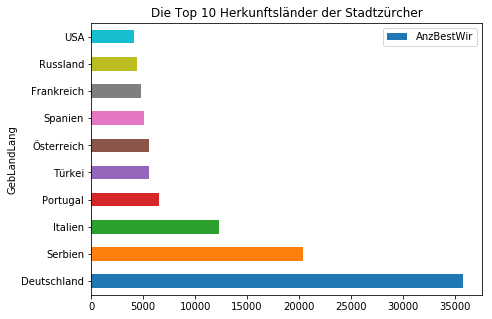

In [34]:
titel = "Die Top 10 Herkunftsländer der Stadtzürcher"
df[df['GebLandSort'] != 8100].sort_values('AnzBestWir', ascending=False).head(10).plot(kind="barh", x="GebLandLang", y="AnzBestWir", figsize=(7,5), title=titel)

**Plot:** Ein Histogramm, das die Verteilung der Anzahl Personen über alle Geburtsorte anzeigt.

Text(0.5, 1.0, 'Wo die Stadtzürcher geboren sind')

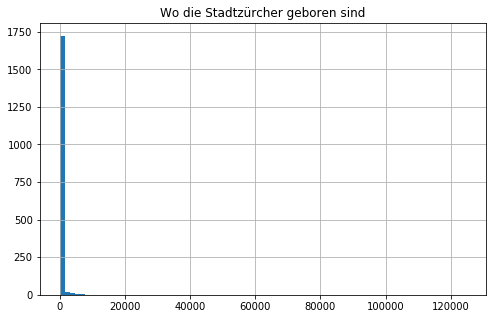

In [48]:
titel = "Wo die Stadtzürcher geboren sind"
inhalt = df['AnzBestWir'].hist(bins=80, figsize=(8,5))

inhalt.set_title(titel)

**Plot :** Ein Histogramm mit derselben Verteilung – nur für Einwohner, die aus der Schweiz stammen, aber nicht in Zürich geboren sind.

Text(0.5, 1.0, 'Wo die in Zürich lebenden Schweizer geboren sind')

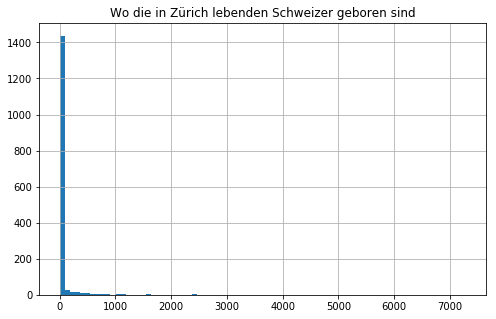

In [49]:
titel = "Wo die in Zürich lebenden Schweizer geboren sind"
inhalt = df[(df["GebLandSort"] == 8100) & (df["GebOrtLang"] != "Zürich")]["AnzBestWir"].hist(bins=80, figsize=(8,5))

inhalt.set_title(titel)


Erkennt man aus diesem Chart irgendetwas interessantes?

In [ ]:
# Nein. Viele Leute aus wenigen Gemeinden und wenige aus vielen Gemeinden.


Erstellen Sie einen weiteren Plot - der die Verteilung dieser Personen nochmals anders zeigt.

Reihen Sie die Gemeinden auf der x-Achse nach Personenzahl auf, bilden Sie auf der y-Achse die Anzahl Personen ab.

Tipp: `.reset_index()` benutzen, um die Gemeinden nach dem Sortieren aufzureihen.

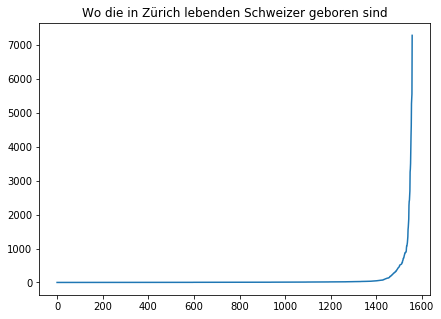

In [55]:
titel = "Wo die in Zürich lebenden Schweizer geboren sind"

df[(df["GebLandSort"] == 8100) & (df["GebOrtLang"] != "Zürich")].sort_values("AnzBestWir").reset_index()["AnzBestWir"].plot(figsize=(7,5), title=titel)


## Neue Spalte erstellen

Die x- und y-Koordinaten der Gemeinden sind im System der Schweizer Landeskoordinaten angegeben: https://de.scoutwiki.org/Schweizer_Landeskoordinaten. Eine Einheit darauf entspricht einem Meter.

Ein Ort mit den x/y-Koordinaten (000000 / 000000) ist also zB 20 Meter entfernt von einem anderen Ort mit den Koordinaten (000000 / 0000*20*).

Die Koordinaten von Zürich sind: (683100.0 / 247100.0).

Erstellen Sie eine neue Spalte mit dem Namen "Distanz", welche die Distanz einer Ortschaft zu Zürich enthält.

Tipp: Pythagoras anwenden ;-) https://www.sofatutor.ch/mathematik/geometrie/berechnungen-an-dreiecken/satz-des-pythagoras

In [59]:
df["Distanz"] = ((df['xkoord'] - 683100)**2 + (df['ykoord'] - 247100)**2)**0.5

Checken Sie anhand der ersten zwei Zeilen, ob die Berechnung funktioniert hat.

In [60]:
df.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877


Checken Sie, dass die Spalte "Distanz" in Zürich gleich null ist.

In [61]:
df[df['GebOrtLang'] == 'Zürich']

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583,0.0,0.0


**Plots:**

Erstellen Sie einen Scatterplot: Alle Orte ausser Zürich.

Auf der x-Achse: die Distanz von Zürich. Auf der y-Achse: die Anzahl Personen.

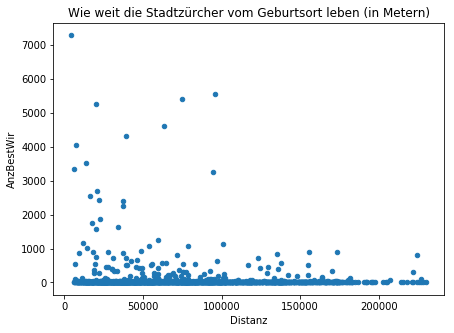

In [67]:
titel = "Wie weit die Stadtzürcher vom Geburtsort leben (in Metern)"

df[df["GebOrtLang"] != "Zürich"].plot(kind="scatter", x="Distanz", y="AnzBestWir", figsize=(7,5), title=titel)


Gibt es einen Zusammenhang?

In [ ]:
# In Worten Na ja, mit viel gutem Willen: 
#die Leute kommen aus der ganzen Schweiz (radiusmässig gesehen...)

Wir können versuchen, den obigen Chart noch etwas besser hinzukriegen. Und zwar so:

## Numerische Wert kategorisieren

Unsere Distanz-Spalte ist momentan ein Kontinuum: Wir haben für jede Spalte einen exakten Wert.

Nun wollen wir diese Werte in Töpfe reinschmeissen: Zum Bespiel: 0 bis 10'000 Personen, 10'000 bis 20'000 Personen, etc.

**Variante 1:** Wir runden einfach auf den nächsten Zehntausender.

Erstellen Sie eine neue Spalte: "Distanz_gerundet".

Benutzen Sie dazu die Funktion `.round()` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html)

In [68]:
df["Distanz_gerundet"] = df["Distanz"].round(-4)

Checken Sie anhan der ersten zwei Zeilen ab, ob es funktioniert hat:

In [69]:
df.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0


Erstellen Sie nun einen ähnlichen Plot wie zuvor - nicht als Scatter, sondern als Barchart.

Wir wollen wissen: Wie viele Personen kommen jeweils insgesamt aus den Orten, die innerhalb eines bestimmten Radius zu Zürich liegen?

Vorgehen:

1. Gruppieren nach gerundeter Distanz

1. Anzahl Personen summieren

1. Plot, Barchart

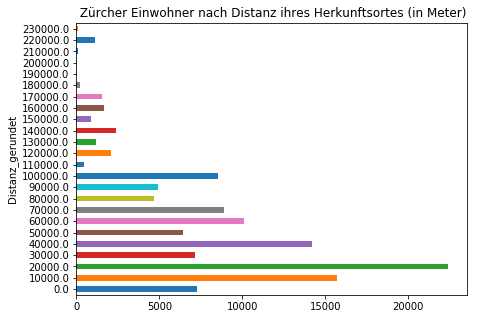

In [70]:
titel = " Zürcher Einwohner nach Distanz ihres Herkunftsortes (in Meter)"
df[df["GebOrtLang"] != "Zürich"].groupby("Distanz_gerundet")["AnzBestWir"].sum().plot(kind="barh", figsize=(7,5), title=titel)


Gibt es einen Zusammenhang?

In [ ]:
# Die meisten "Zuwanderer" kommen aus der Nähe von Zürich

**Variante 2 (Bonus):** Wir benutzen eine spezielle Kategorisierungsfunktion.

Und zwar: pd.cut() - (https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)

Diese Funktion "schneidet" unsere Distanz-Spalte in so viele gleich lange Stücke ("bins"), wie wir wollen.

Zum Beispiel: in 50 Stücke. Und sie spuckt gleich zu jedem Eintrag aus, in welches Stück er gehört.

In [ ]:
# pd.cut(df['Distanz'], bins=50)

Wir müssen die Funktion jetzt anwenden (kreieren Sie die Spalte "Distanz_Kategorie")

In [71]:
df["Distanz_Kategorie"] = pd.cut(df["Distanz"], bins=50)

Check, erste zwei Zeilen. Das sieht dann so aus: wir erhalten ein Intervall, mit oberer und unterer Grenze.

In [72]:
df.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]"
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]"


Wir können nun den analogen Plot wie bei Variante 1 erstellen:

1. Gruppieren nach kategorisierter Distanz

1. Anzahl Personen summieren

1. Plot, Barchart

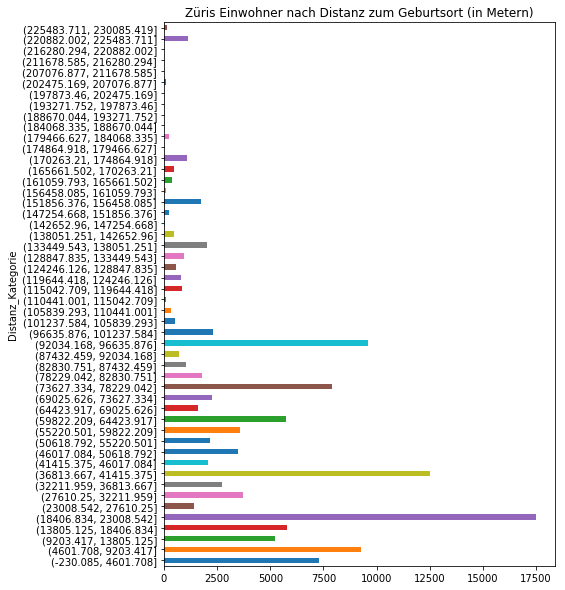

In [74]:
titel = "Züris Einwohner nach Distanz zum Geburtsort (in Metern)"
df[df["GebOrtLang"] != "Zürich"].groupby("Distanz_Kategorie")["AnzBestWir"].sum().plot(kind="barh", figsize=(7,10), title=titel)


Inwiefern unterscheidet sich dieser Plot von dem vorherigen?

In [ ]:
# Man sieht dass die neuen Zürcher in grösserer Zahl aus Städten kommen

## Daten kombinieren

Falls Sie im letzten Abschnitt abgehängt haben: egal. Hier kommt was neues.

Wir haben in unserem Datenornder diverse Hilfsdateien:
- Gemeinden_Kantone.xlsx
- Kantone_IDs.csv

Wir können diese Dateien benutzen, um weitere Auswertungen zu machen.

Laden Sie das File "Gemeinden_Kantone.xlsx" und speichern Sie es als Dataframe mit dem Namen `df_gem`

In [86]:
df_gem = pd.read_excel("dataprojects/wherezurichborn/Gemeinden_Kantone.xlsx")

Checken Sie die ersten fünf Spalten.

In [88]:
df_gem.head()

,Gemeinde-Nr,Gemeinde-Name,Kanton-Nr,Bezirk-Nr
0,1,Aeugst am Albis,1,101
1,2,Affoltern am Albis,1,101
2,3,Bonstetten,1,101
3,4,Hausen am Albis,1,101
4,5,Hedingen,1,101


Welche Art von Informationen enthält die Datei?

In [ ]:
# In Worten Gemeinden, ihre IDs, die des Bezirks und Kantons zu denen die Gemeinde gehört

Fügen Sie die Informationen aus `df_gem` in die Haupttabelle ein. Nennen Sie die kombinierte Tabelle `df2`.

Und zwar so, dass die Ortschaften, zu denen es keinen passenden Eintrag in der Hilfstabelle gibt, erhalten bleiben.

Tipp: `df.merge()` benutzen.

In [89]:
df2 = df.merge(df_gem, how='left', left_on='GebOrtSort', right_on='Gemeinde-Nr')

Check anhand von zwei Zeilen: hat es funktioniert?

In [91]:
df2.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Gemeinde-Nr,Gemeinde-Name,Kanton-Nr,Bezirk-Nr
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,Aeugst am Albis,1.0,101.0
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]",2.0,Affoltern am Albis,1.0,101.0


Die Spalte mit dem Gemeindenamen haben wir nun zweimal! Schmeissen Sie den zweiten Eintrag raus. Schmeissen Sie gleichzeitig auch die importierte Gemeinde-Nummer raus, die haben wir ebenfalls zweimal (Ordnung muss sein!). Check anhand von zwei Zeilen.

In [92]:
df2.pop("Gemeinde-Name")
df2.pop("Gemeinde-Nr")

df2.head(2)


,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,101.0
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]",1.0,101.0


Laden Sie nun noch das File "Kantone_IDs.csv" und fügen die Infos in die Haupttabelle ein.

Vorgehen: Analog wie gerade eben.
- Datei laden
- Tabellen mergen
- Überflüssige Spalten rauswerfen

Speichern Sie die kombinierte Tabelle unter dem Namen `df3`

In [93]:
df_kant = pd.read_csv("dataprojects/wherezurichborn/Kantone_IDs.csv")

In [94]:
df_kant.head(2)

,Kanton_Nr,Kanton_Name
0,1,Zürich
1,2,Bern


In [100]:
df3 = df2.merge(df_kant, how="left", left_on="Kanton-Nr", right_on="Kanton_Nr")

In [101]:
df3.pop("Kanton_Nr")
df3.head(2)


,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr,Kanton_Name
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich


In welchen zehn Kantonen wurden die meisten Einwohner der Stadt Zürich geboren? Liste ...

In [103]:
df3.groupby("Kanton_Name")["AnzBestWir"].sum().sort_values(ascending=False).head(10)

Kanton_Name
Zürich         163407
St. Gallen      11817
Bern            11410
Aargau          11287
Graubünden       6420
Luzern           6283
Basel-Stadt      5425
Thurgau          4519
Ticino           3316
Solothurn        2978
Name: AnzBestWir, dtype: int64

... und **Plot:** die Top 2 bis 9 (also Zürich nicht), Barchart horizontal.

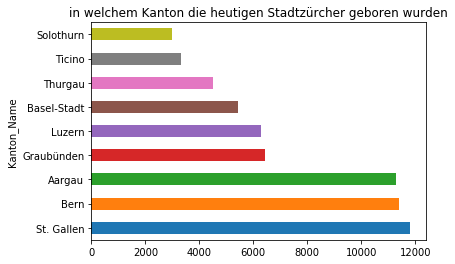

In [104]:
titel = "in welchem Kanton die heutigen Stadtzürcher geboren wurden"
df3.groupby("Kanton_Name")["AnzBestWir"].sum().sort_values(ascending=False).head(10).tail(9).plot(kind='barh', title=titel)

## Daten kombinieren 2

Wir haben auch noch ein File, das die Einwohnerzahl jeder Gemeinde angibt:
- Gemeinde_Einwohner.xlsx

Laden Sie die Datei und fügen Sie die wesentlichen Infos daraus in unsere Haupttabelle ein (`df3` -> `df4`)

In [105]:
df_einwohner = pd.read_excel("dataprojects/wherezurichborn/Gemeinde_Einwohner.xlsx")

In [106]:
df_einwohner.head(2)

,Gemeindecode,Gemeindename,Einwohner
0,1,Aeugst am Albis,1981
1,2,Affoltern am Albis,11708


In [108]:
df4 = df3.merge(df_einwohner, how='left', left_on='GebOrtSort', right_on='Gemeindecode')

In [109]:
df4.pop("Gemeindecode")
df4.pop("Gemeindename")
df4.head(2)



,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr,Kanton_Name,Einwohner
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,1981.0
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,11708.0


**Scatterplot :** Gemeindegrösse vs Anzahl Personen in Zürich. Alle Gemeinden ausser Zürich.

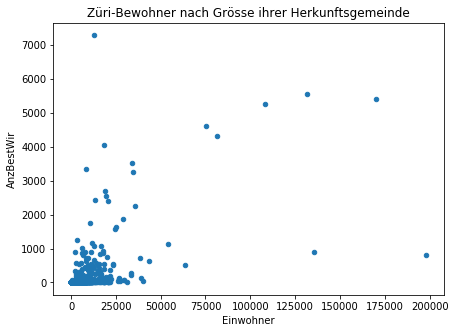

In [110]:
titel = "Züri-Bewohner nach Grösse ihrer Herkunftsgemeinde"
df4[df4["GebOrtLang"] != "Zürich"].plot(kind="scatter", x="Einwohner", y="AnzBestWir", figsize=(7,5), title=titel)


Erkennt man daraus einen Zusammenhang?

In [ ]:
# In Worten Nicht auf dieser Basis... 
#denn wie gross sind die durchschnittlichen Schweizer Gemeinden?

Bringt es etwas, wenn wir die Einwohnerdaten klassifizieren, analog zu oben mit den Distanzen?

Vielleicht mit dieser Funktion hier? https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html

Probieren Sie es aus.

In [111]:
df4['Einwohner_Kategorie'] = pd.qcut(df4['Einwohner'], 15)

In [112]:
df4.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,AnzBestWir,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr,Kanton_Name,Einwohner,Einwohner_Kategorie
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,1981.0,"(1949.933, 2367.267]"
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,11708.0,"(7693.733, 12545.2]"


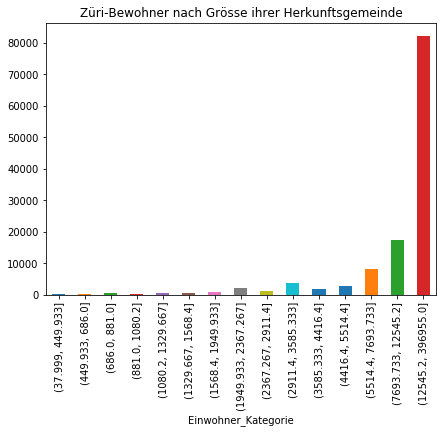

In [113]:
titel = "Züri-Bewohner nach Grösse ihrer Herkunftsgemeinde"
df4[df4["GebOrtLang"] != "Zürich"].groupby("Einwohner_Kategorie")["AnzBestWir"].sum().plot(kind='bar', figsize=(7,5), title=titel)


## Vergleich 2016

Wir sind fast fertig! Das letzte File im Directory heisst:
- 2016_bev338od3380.csv

Es ist dieselbe Datenbank, einfach mit den Vorjahreswerten.

Zeitvergleiche sind immer gut, um eine Story zu generieren. Schauen wir mal, was rauskommt.

Lesen Sie die Datei ein und geben Sie ihr den Namen `dfx`

In [114]:
dfx = pd.read_csv("dataprojects/wherezurichborn/2016_bev338od3380.csv")

Alle Spalten löschen bis auf "GebOrtSort" und "AnzBestWir"

In [115]:
dfx2 = dfx[['GebOrtSort', 'AnzBestWir']]

Fügen Sie die Vorjahreswerte zu unserer Datenbank df5 hinzu.

In [116]:
df5 = df4.merge(dfx2, how='inner', on='GebOrtSort')

Ein bisschen Spalten-Renaming würde Sinn machen, zB die beiden Spalten 'AnzBestWir' mit den Jahreszahlen 2016 und 2017 beschriften

In [118]:
neue_spalten = {
    'AnzBestWir_x': '2017',
    'AnzBestWir_y': '2016',
}


In [119]:
df5.rename(columns=neue_spalten, inplace=True)

Check:

In [120]:
df5.head(2)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,2017,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr,Kanton_Name,Einwohner,Einwohner_Kategorie,2016
0,2017,679300.0,235700.0,1,Aeugst am Albis,8100,Schweiz,8,12016.655109,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,1981.0,"(1949.933, 2367.267]",7
1,2017,676800.0,236800.0,2,Affoltern am Albis,8100,Schweiz,1171,12073.938877,12073.938877,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,11708.0,"(7693.733, 12545.2]",1134


Erstellen Sie eine neue Spalte mit dem Namen "Zunahme". Inhalt: Differenz der beiden Jahreswerte.

In [121]:
df5["Zunahme"] = df5["2017"] - df5["2016"]

Aus welchen zehn Schweizer Ortschaften hat die Zürcher Bevölkerung am meisten zugenommen? Liste.

In [122]:
df5[df5["GebLandSort"] == 8100].sort_values("Zunahme", ascending=False).head(10)

,StichtagDatJahr,xkoord,ykoord,GebOrtSort,GebOrtLang,GebLandSort,GebLandLang,2017,Distanz,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr,Kanton_Name,Einwohner,Einwohner_Kategorie,2016,Zunahme
155,2017,683100.0,247100.0,261,Zürich,8100,Schweiz,124583,0.000000,0.000000,0.0,"(-230.085, 4601.708]",1.0,112.0,Zürich,396955.0,"(12545.2, 396955.0]",123144,1439
109,2017,685800.0,243800.0,161,Zollikon,8100,Schweiz,7285,4263.801121,4263.801121,0.0,"(-230.085, 4601.708]",1.0,107.0,Zürich,12753.0,"(12545.2, 396955.0]",6677,608
186,2017,600100.0,199700.0,351,Bern,8100,Schweiz,5558,95581.169694,95581.169694,100000.0,"(92034.168, 96635.876]",2.0,246.0,Bern,131554.0,"(12545.2, 396955.0]",5446,112
94,2017,696000.0,229300.0,138,Richterswil,8100,Schweiz,2427,21982.947937,21982.947937,20000.0,"(18406.834, 23008.542]",1.0,106.0,Zürich,13198.0,"(12545.2, 396955.0]",2324,103
150,2017,676200.0,250000.0,247,Schlieren,8100,Schweiz,4039,7484.650960,7484.650960,10000.0,"(4601.708, 9203.417]",1.0,111.0,Zürich,18453.0,"(12545.2, 396955.0]",3952,87
125,2017,696700.0,245000.0,198,Uster,8100,Schweiz,3509,13761.177275,13761.177275,10000.0,"(9203.417, 13805.125]",1.0,109.0,Zürich,33886.0,"(12545.2, 396955.0]",3424,85
88,2017,702700.0,242100.0,121,Wetzikon (ZH),8100,Schweiz,1562,20227.703775,20227.703775,20000.0,"(18406.834, 23008.542]",1.0,105.0,Zürich,24407.0,"(12545.2, 396955.0]",1484,78
36,2017,683000.0,263700.0,53,Bülach,8100,Schweiz,2551,16600.301202,16600.301202,20000.0,"(13805.125, 18406.834]",1.0,103.0,Zürich,19393.0,"(12545.2, 396955.0]",2480,71
725,2017,611300.0,267600.0,2701,Basel,8100,Schweiz,5422,74669.203826,74669.203826,70000.0,"(73627.334, 78229.042]",12.0,1200.0,Basel-Stadt,169916.0,"(12545.2, 396955.0]",5353,69
440,2017,666200.0,211800.0,1061,Luzern,8100,Schweiz,4326,39136.939073,39136.939073,40000.0,"(36813.667, 41415.375]",3.0,311.0,Luzern,81295.0,"(12545.2, 396955.0]",4264,62


... und **Plot**, am besten Bar horizontal.

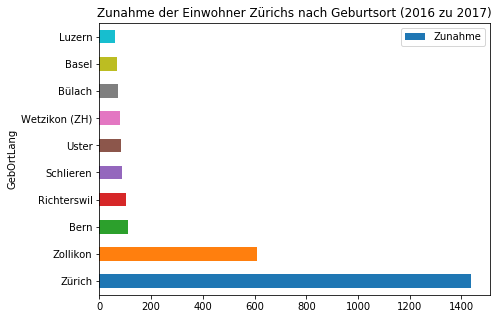

In [124]:
titel = "Zunahme der Einwohner Zürichs nach Geburtsort (2016 zu 2017)"
df5[df5["GebLandSort"] == 8100].sort_values("Zunahme", ascending=False).head(10).plot(kind="barh", x="GebOrtLang", y="Zunahme", figsize=(7,5), title=titel)


Aus welchen zehn Kantonen hat die Zürcher Bevölkerung am meisten zugenommen? Liste ...

In [126]:
df5[(df5["GebLandSort"] == 8100)
    & (df5["GebOrtLang"] != "Zürich")
   ].groupby("Kanton_Name")["Zunahme"].sum().sort_values(ascending=False).head(10)

Kanton_Name
Zürich         1100
Ticino          106
Bern             89
Zug              72
Basel-Stadt      66
Genève           56
Solothurn        21
Aargau           17
Luzern           16
Vaud             16
Name: Zunahme, dtype: int64

... und **Plot**. Wir haben eine Headline: *"Masseneinwanderung aus dem Kanton XX nach Zürich!"*

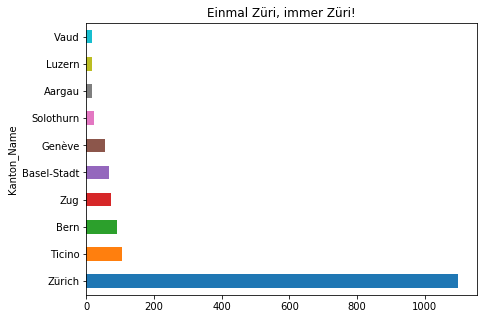

In [127]:
titel = "Einmal Züri, immer Züri!"
df5[(df5['GebLandSort'] == 8100) & (df5['GebOrtLang'] != 'Zürich')].groupby('Kanton_Name')['Zunahme'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,5), title=titel)


**Plot** zu den zehn Kantonen, aus denen die ZH-Bevölkerung am meisten zurückgeht. Headline?

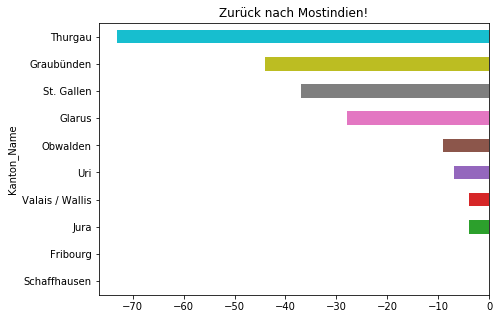

In [128]:
titel = "Zurück nach Mostindien!"
df5[(df5['GebLandSort'] == 8100) & (df5['GebOrtLang'] != 'Zürich')].groupby('Kanton_Name')['Zunahme'].sum().sort_values(ascending=False).tail(10).plot(kind='barh', figsize=(7,5), title=titel)


## Bonus: Geoplotting

Ab hier können Sie sich zurücklehnen - es ist nur noch klicken angesagt.

Wir plotten zum Spass noch auf einer Karte, woher die Zürcher Bevölkerung stammt.

Funktioniert allerdings nur, wenn bis jetzt das meiste einigermassen richtig gelöst wurde!

### Libraries

In [129]:
import geopandas as gpd

In [130]:
from shapely.geometry import Point

In [131]:
import matplotlib.pyplot as plt

### Shapefiles
Dieselben, die wir bereits bei den Immobilien benutzt haben

In [132]:
gdf_ch = gpd.read_file('dataprojects/immobilienboom/shp/g1l17.shp')
gdf_ch.head(2)

,CODE_ISO,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,CH,4129079,485411,833841,75270,295934,659600,201300,192,4631,1306,1079,2485411,2833841,1075270,1295934,2659600,1201300,"POLYGON ((684983.9200000018 295673.9862499982,..."


In [133]:
gdf_gemeinden = gpd.read_file('dataprojects/immobilienboom/shp/g1g17.shp')
gdf_gemeinden.head(2)

,GMDNR,GMDNAME,BZNR,KTNR,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,...,Z_AVG,Z_MED,Z_CNTR,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Aeugst am Albis,101,1,4,791,678110,681154,234561,238544,...,684,673,699,2678110,2681154,1234561,1238544,2679300,1235700,"POLYGON ((680805.2512499988 237763.620000001, ..."
1,10,Obfelden,101,1,4,754,672793,676118,232987,237091,...,439,439,452,2672793,2676118,1232987,1237091,2675100,1235300,"POLYGON ((676118.2525000013 235522.7037499994,..."


In [134]:
gdf_lakes = gpd.read_file('dataprojects/immobilienboom/shp/g1s17.shp')
gdf_lakes.head(2)

,GMDNR,GMDNAME,SEE_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,Shape_Le_1,Shape_Ar_1,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,9040,Greifensee,830,691664,695945,241896,247739,693800,245200,15459.816399,8.720091e+06,2691664,2695945,1241896,1247739,2693800,1245200,"POLYGON ((695431.5425000004 242400.4287500009,..."
1,9050,Zürichsee,8805,682600,714352,227657,247369,690500,235000,88407.094285,9.170169e+07,2682600,2714352,1227657,1247369,2690500,1235000,"POLYGON ((682667.2287500016 247385.5425000004,..."


### Informationen aus unserem Dataframe ins Shapefile

In [135]:
gdf_gemeinden_m = gdf_gemeinden.merge(df5, how="inner", left_on="GMDNR", right_on="GebOrtSort")

In [136]:
gdf_gemeinden_m.head(2)

,GMDNR,GMDNAME,BZNR,KTNR,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,...,Entfernung,Distanz_gerundet,Distanz_Kategorie,Kanton-Nr,Bezirk-Nr,Kanton_Name,Einwohner,Einwohner_Kategorie,2016,Zunahme
0,1,Aeugst am Albis,101,1,4,791,678110,681154,234561,238544,...,12016.655109,10000.0,"(9203.417, 13805.125]",1.0,101.0,Zürich,1981.0,"(1949.933, 2367.267]",7,1
1,10,Obfelden,101,1,4,754,672793,676118,232987,237091,...,14256.226710,10000.0,"(13805.125, 18406.834]",1.0,101.0,Zürich,5009.0,"(4416.4, 5514.4]",12,-1


Und die Geometrie auf "Point" anpassen

In [137]:
gdf_gemeinden_m['point_geometry'] = gdf_gemeinden_m.apply(lambda row: Point(row.X_CNTR, row.Y_CNTR), axis=1)

In [138]:
gdf_gemeinden_m = gdf_gemeinden_m.set_geometry('point_geometry')

Ein paar Vorbereitungen für den Plot

In [139]:
title_font = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'bold',
    'size': 20
}

In [140]:
gdf_gemeinden_m['markersize'] = (gdf_gemeinden_m['Einwohner'] ** 0.5) / 1.5
gdf_gemeinden_m['markersize_17'] = (gdf_gemeinden_m['2017'] ** 0.5) / 1.5

### Plot

**Variante 1:** Herkunft fürs Jahr 2017 nach Gemeinde

(468012.53868749924, 851258.1500624996, 52313.7245000014, 309215.21549999993)

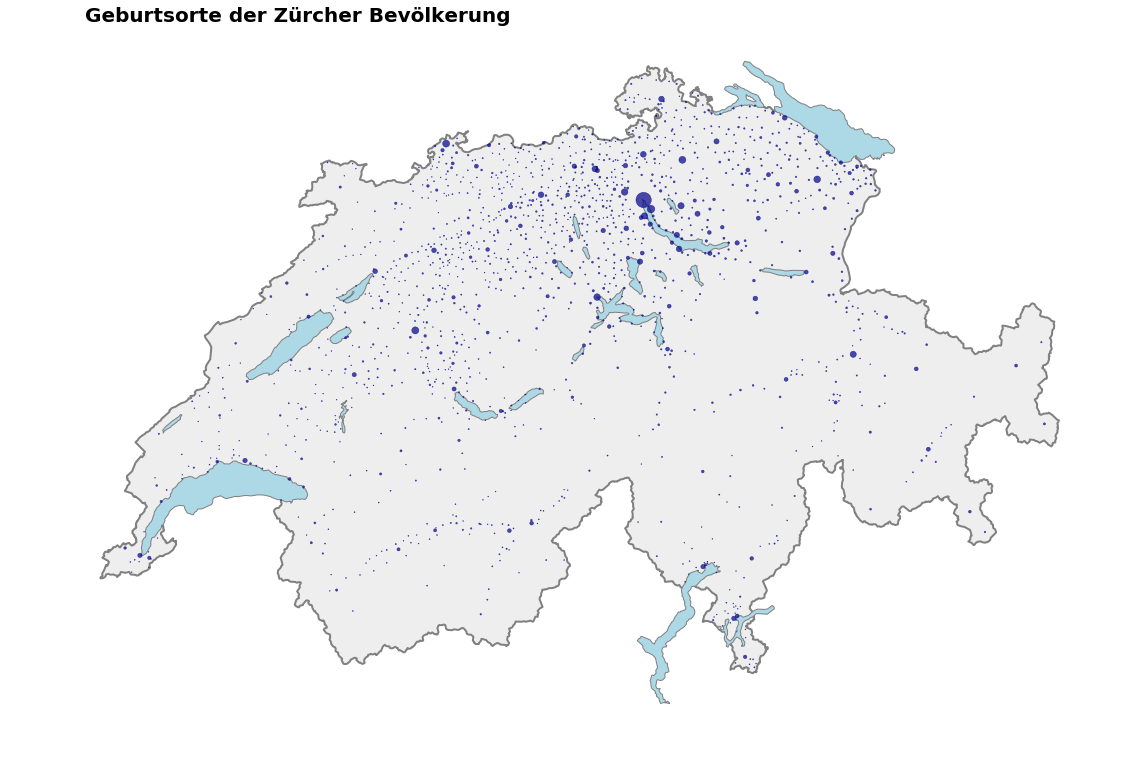

In [141]:
# Code für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='#EEEEEE', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

# Für jede Gemeinde einen Punkt - Herkunft 2017
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize_17'], color='darkblue', alpha=0.7, linewidth=0.5, legend=True, ax=ax)

my_title = "Geburtsorte der Zürcher Bevölkerung"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

**Variante 2:** Wir zeichnen auch noch die Grösse der Gemeinde auf

(468012.53868749924, 851258.1500624996, 52313.7245000014, 309215.21549999993)

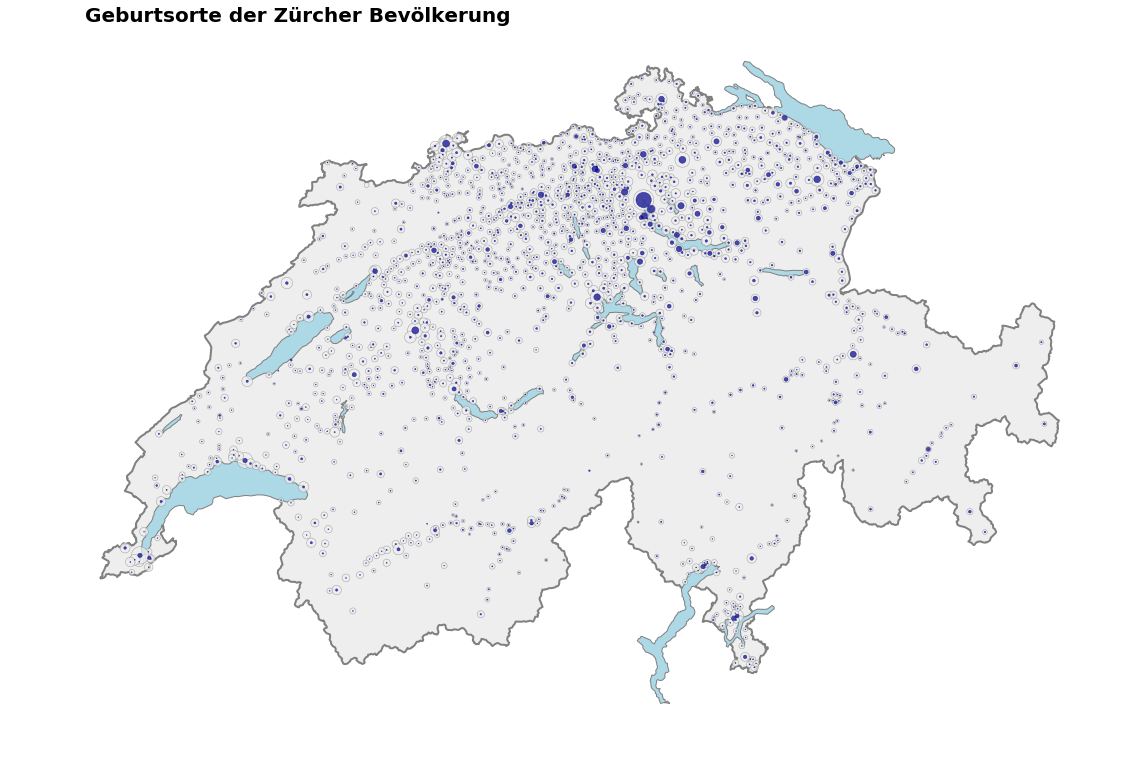

In [142]:
# Code für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='#EEEEEE', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

# Für jede Gemeinde einen Kreis - Einwohnerzahl
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize'], edgecolor='grey', color='#EEEEEE', alpha=0.7, linewidth=0.5, legend=True, ax=ax)
# Für jede Gemeinde einen Punkt - Herkunft 2017
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize_17'], color='darkblue', alpha=0.7, linewidth=0.5, legend=True, ax=ax)

my_title = "Geburtsorte der Zürcher Bevölkerung"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

 **Variante 3:** Farbliche Codierung der Zuwanderung 2016-2017 

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(468012.53868749924, 851258.1500624996, 52313.7245000014, 309215.21549999993)

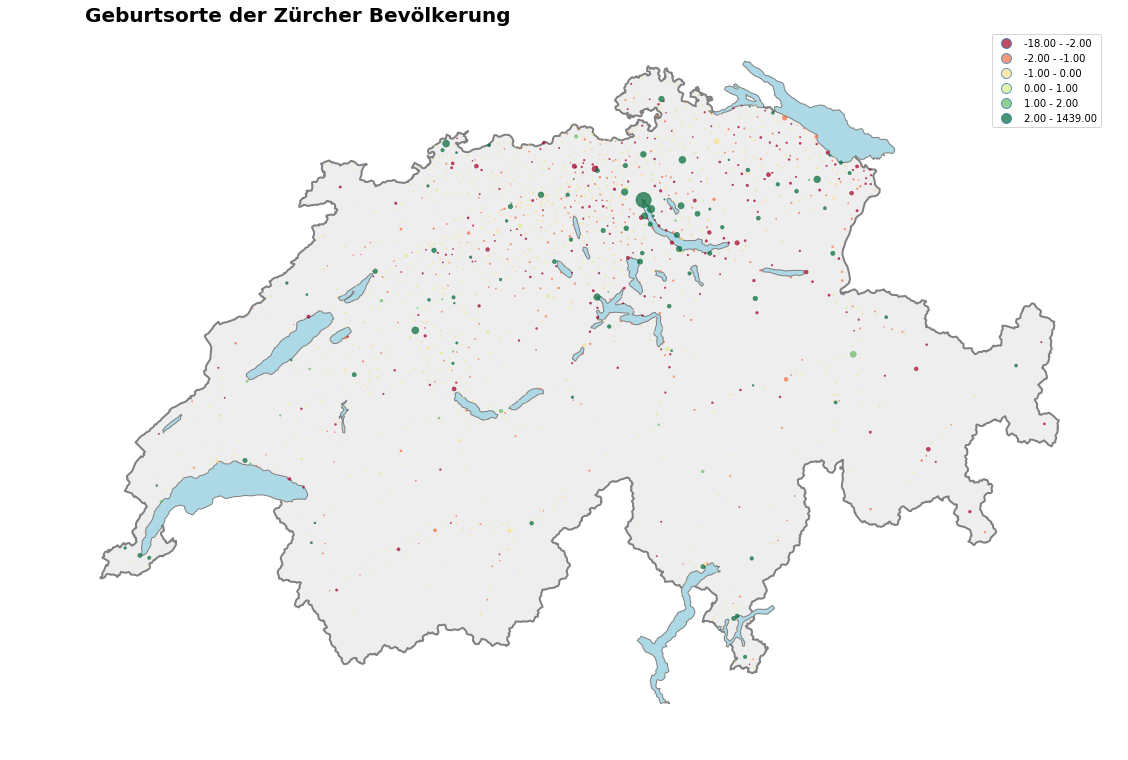

In [143]:
# Code für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='#EEEEEE', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

# Für jede Gemeinde einen Punkt - Herkunft 2017 - Farbe gemäss Spalte "Zunahme"
gdf_gemeinden_m.plot(markersize=gdf_gemeinden_m['markersize_17'], column='Zunahme', scheme='quantiles', k=15, cmap='RdYlGn', alpha=0.7, linewidth=0.5, legend=True, ax=ax)

my_title = "Geburtsorte der Zürcher Bevölkerung"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')